# Load packages

In [1]:
import os

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import time
import leiden as l

# Load data

In [2]:
file = open("description.txt", "w")
file.write("Adam Frej Piotr Marciniak\n")
file.write("https://github.com/cinekele/leiden\n")

35

## Unknown number of communities

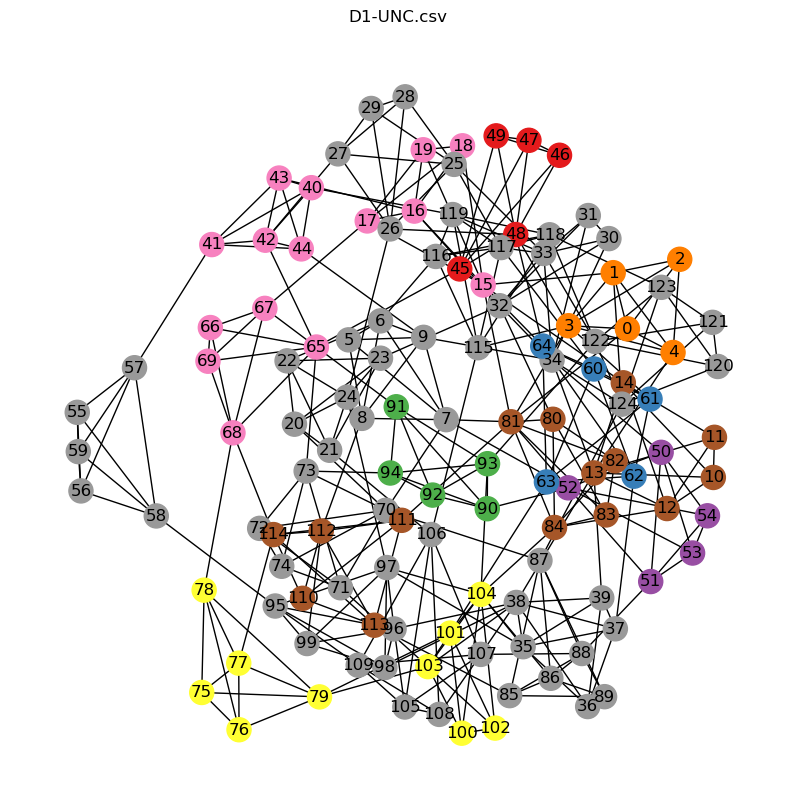

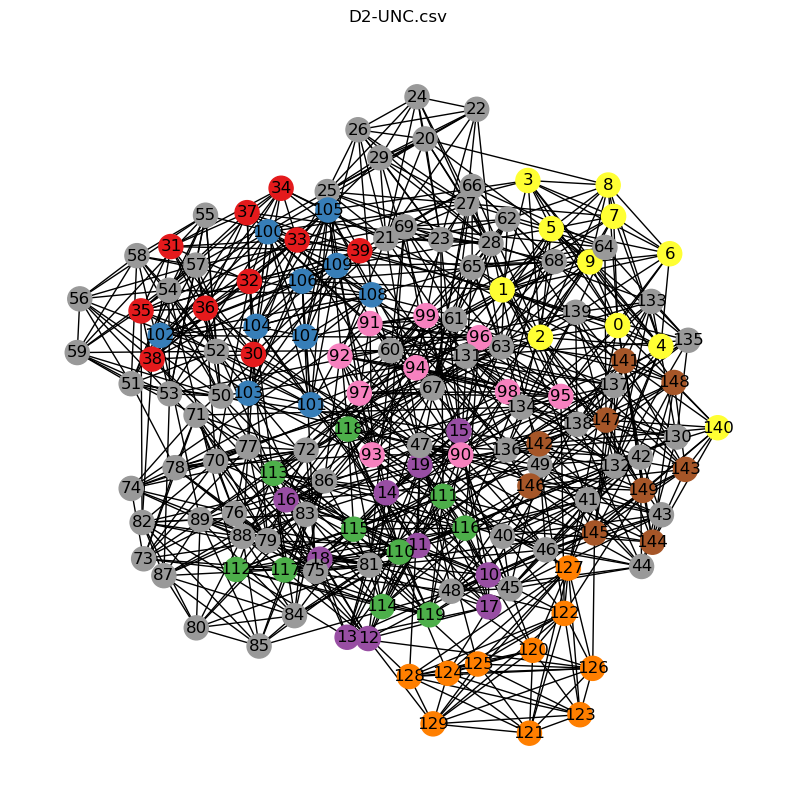

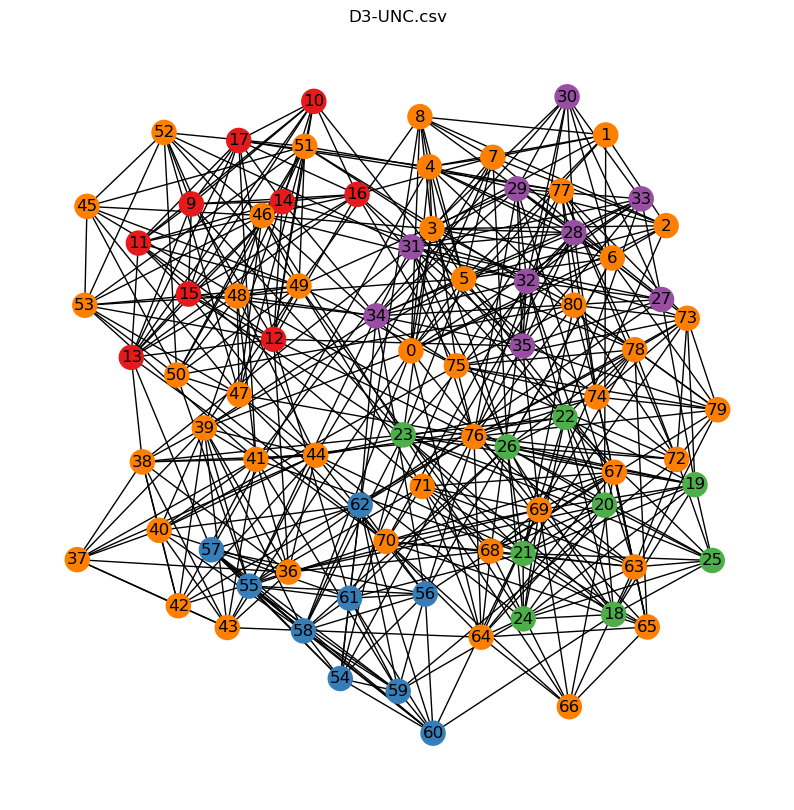

In [3]:
def read_data(filename) -> nx.Graph:
    adjacency_matrix = np.loadtxt(filename, delimiter=',')
    graph = nx.from_numpy_array(adjacency_matrix)
    return graph


def get_colors(graph, cmap, partition):
    result = []
    for node in graph.nodes:
        for color, community in partition.items():
            if node in community:
                result.append(cmap(color))
    return result


filenames = [
    'D1-UNC.csv',
    'D2-UNC.csv',
    'D3-UNC.csv'
]

for filename in filenames:
    graph = read_data(os.path.join("data", filename))
    time_start = time.time()
    partition, community_contains = l.leiden(graph)
    time_end = time.time()
    l.leiden_format(community_contains, filename)
    file.write(f"{filename}, {time_end - time_start}\n")
    plt.figure(figsize=(10, 10))
    plt.title(f"{filename}")
    cmap = plt.get_cmap("Set1")
    node_colors = get_colors(graph, cmap, community_contains)
    nx.draw_networkx(graph, node_color=node_colors, with_labels=True, pos=nx.kamada_kawai_layout(graph))
    plt.axis('off')
    plt.show()

## Known number of communities

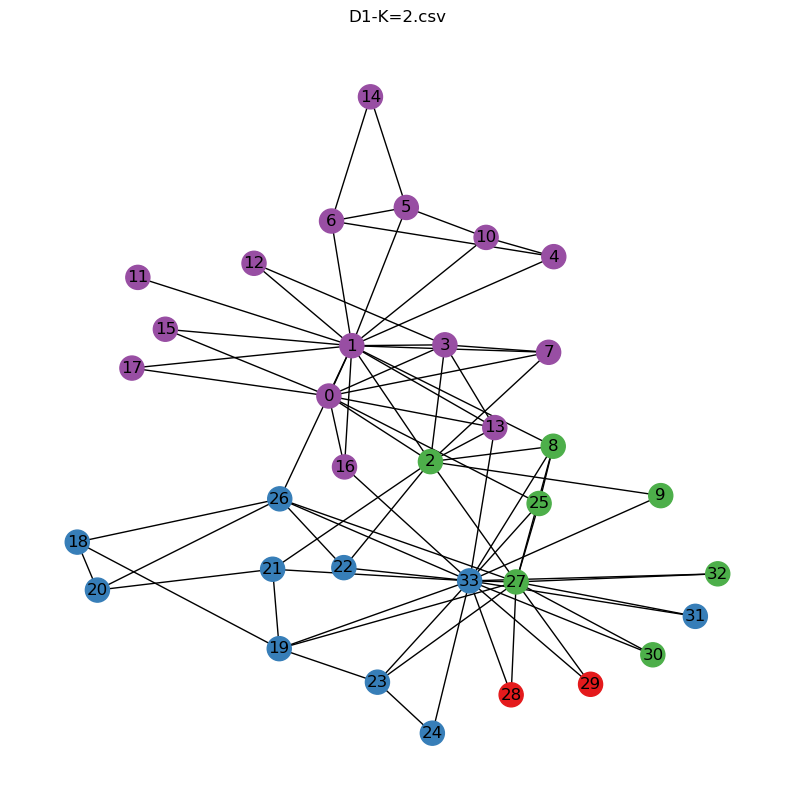

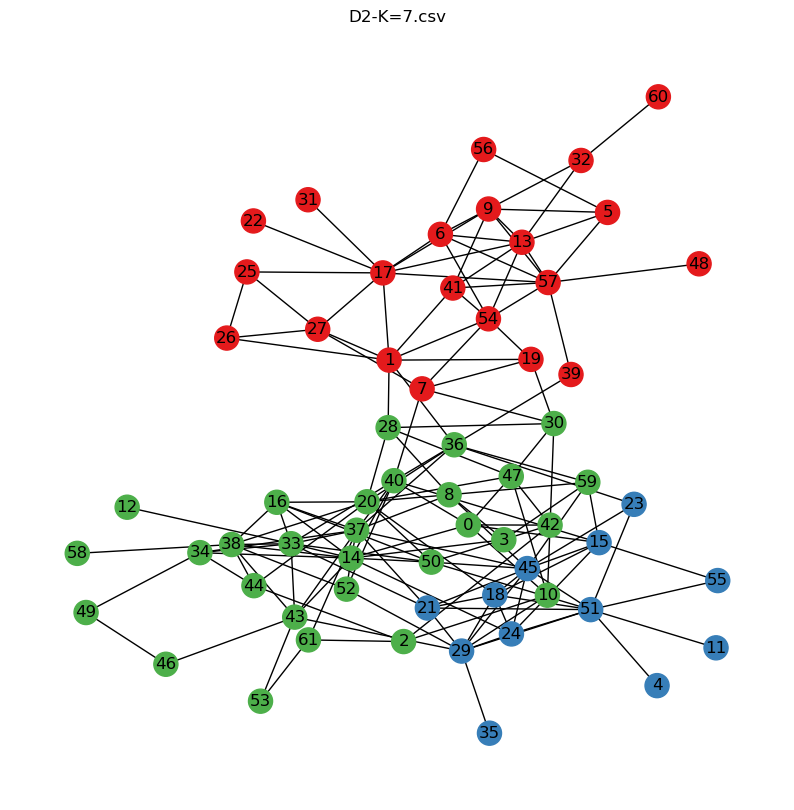

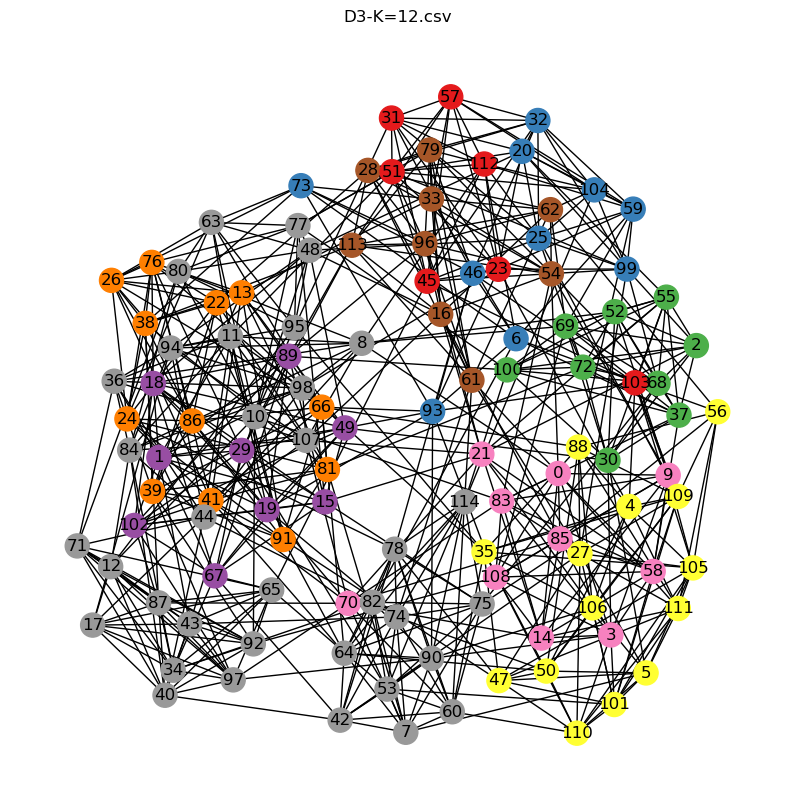

In [4]:
filenames = [
    'D1-K=2.csv',
    'D2-K=7.csv',
    'D3-K=12.csv'
]

for filename in filenames:
    graph = read_data(os.path.join("data", filename))
    time_start = time.time()
    partition, community_contains = l.leiden(graph)
    time_end = time.time()
    l.leiden_format(community_contains, filename)
    file.write(f"{filename}, {time_end - time_start}\n")
    plt.figure(figsize=(10, 10))
    plt.title(f"{filename}")
    cmap = plt.get_cmap("Set1")
    node_colors = get_colors(graph, cmap, community_contains)
    nx.draw_networkx(graph, node_color=node_colors, with_labels=True, pos=nx.kamada_kawai_layout(graph))
    plt.axis('off')
    plt.show()
file.close()